# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [3]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# **Loading the data**

In [4]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
data.shape

(5110, 12)

In [8]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# **Data Cleaning**

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
cols = list(data.columns)
cols_data=cols[1:]

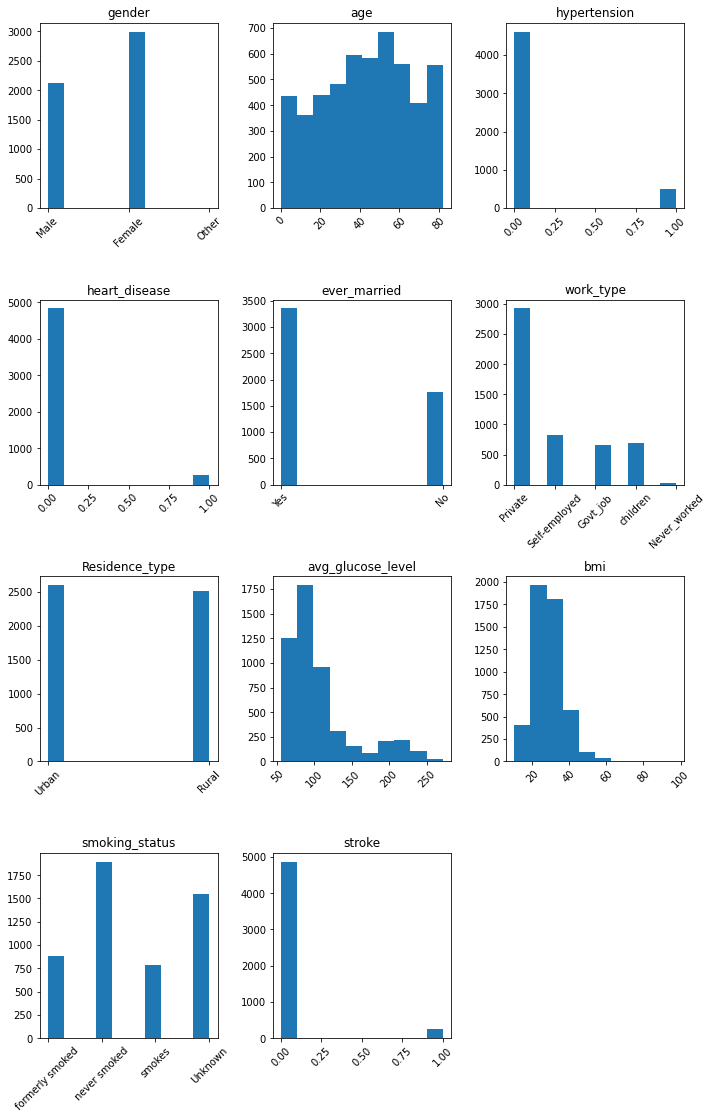

In [15]:
plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(cols_data[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_data[i]])
    
plt.tight_layout()

In [16]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
data = data.drop(data[data['gender']=='Other'].index)

In [19]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [20]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.894559902200488
28.1


In [21]:
bmi_mean=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(bmi_mean)

In [22]:
data['bmi'].isnull().sum()

0

In [23]:
# counting the number of passengers who are satisfied and who Dissatisfied 
pie_df=pd.DataFrame(data.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4860
1,249


# **Exploratory Data Analysis**

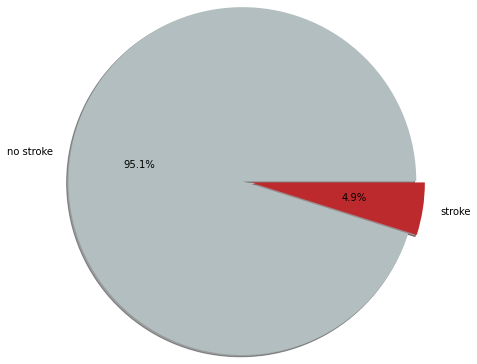

In [24]:
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

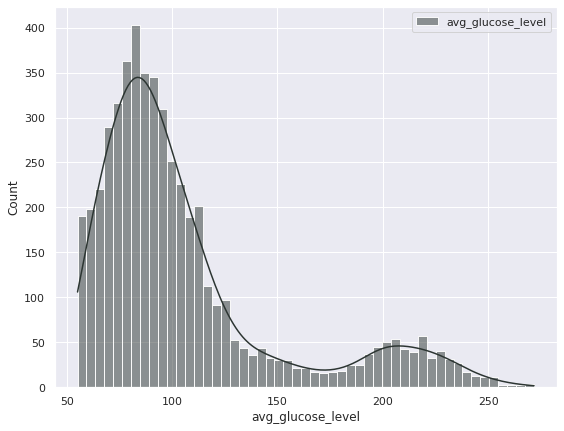

In [25]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.histplot(data['avg_glucose_level'], color="#2C3532", label="avg_glucose_level", kde= True)
plt.legend()

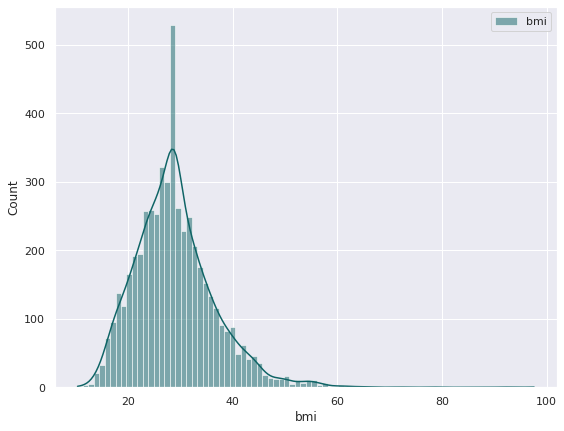

In [26]:
fig = plt.figure(figsize=(9,7))
sns.histplot(data['bmi'], color="#0F6466", label="bmi", kde= True)
plt.legend()

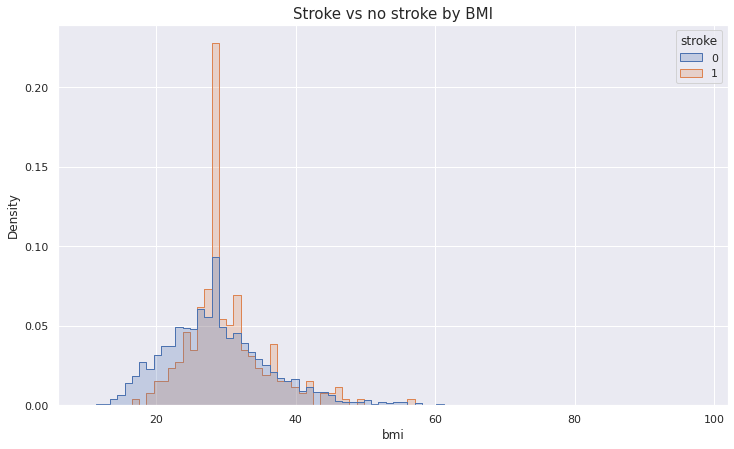

In [27]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

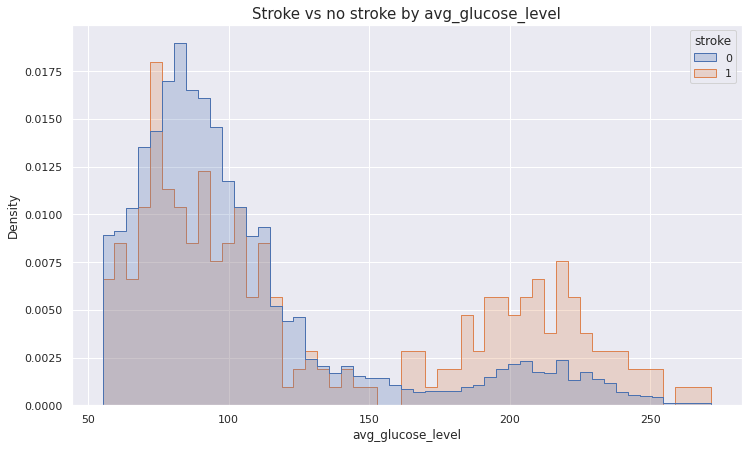

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

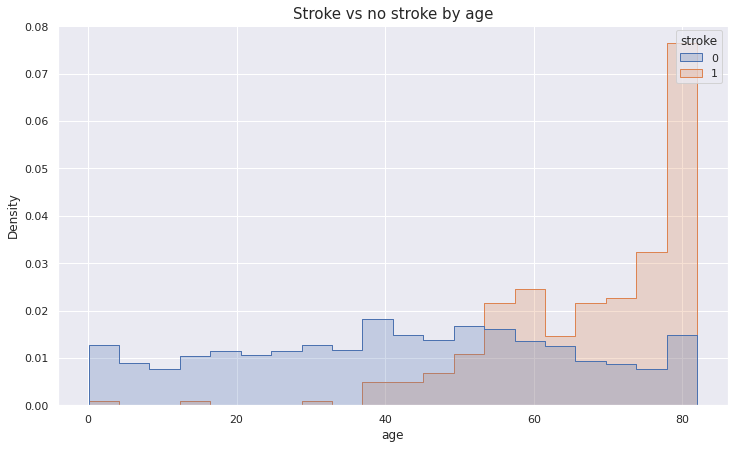

In [29]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

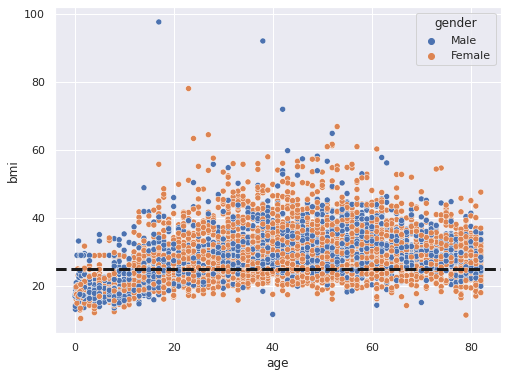

In [30]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=data, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

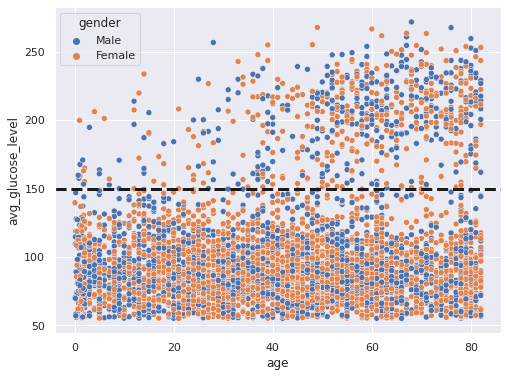

In [31]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=data, x="age", y="avg_glucose_level", hue='gender')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.show()

# **Data Preprocessing**

In [32]:
data.drop('id',axis=1,inplace=True)

In [33]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [34]:
data=pd.get_dummies(data)

In [35]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.00000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.60000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.60000,0,0,0,1,0,0,0,1,0,0


In [36]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [37]:
data.to_csv('heart_stroke.csv')

In [38]:
x_data = data.drop("stroke" , axis = 1).values
y_data = data["stroke"]

# **Splitting and Scaling the data**

In [39]:
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.25 , random_state=42)

In [40]:
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

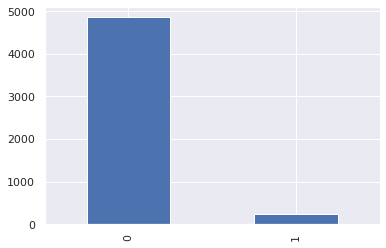

In [41]:
# show the value counts of the calsses in the target
# we can find data impalance
print(data['stroke'].value_counts())
data['stroke'].value_counts().sort_index().plot.bar()

# **Data Resampling**

In [42]:
# Apply oversampling
oversample = SMOTE()
x_data_balanced, y_data_balanced = oversample.fit_resample(x_train, y_train.ravel())

# **Modeling**

In [43]:
# classification with random forest

rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [44]:
y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

1.0
0.9374021909233177


In [45]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

Precision: 0.500
Recall: 0.025
F-measure: 0.048


In [46]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.5862896494156928


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

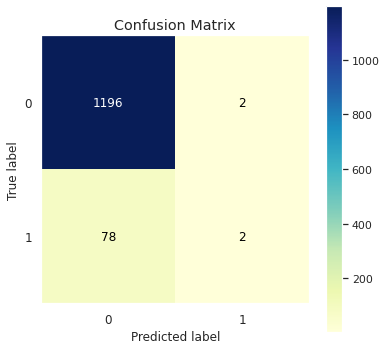

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

In [48]:
dt =DecisionTreeClassifier(max_features=14 , max_depth=12, criterion= 'gini')
dt.fit(x_data_balanced, y_data_balanced)

DecisionTreeClassifier(max_depth=12, max_features=14)

In [49]:
y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.934598580010923
0.7801251956181534


In [50]:
dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

Precision: 0.096
Recall: 0.300
F-measure: 0.146


In [51]:
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

ROC AUC Score: 0.5562186978297162


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

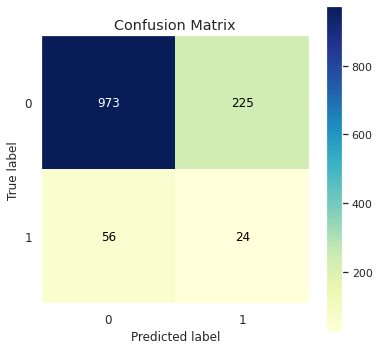

In [52]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

In [53]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(x_data_balanced, y_data_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
y_pred_train_xgb = xgb.predict(x_data_balanced)
acc_train_xgb = accuracy_score(y_data_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

0.9445658110322228
0.9358372456964006


In [55]:
xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

Precision: 0.000
Recall: 0.000
F-measure: 0.000


In [56]:
y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

ROC AUC Score: 0.5842028380634391


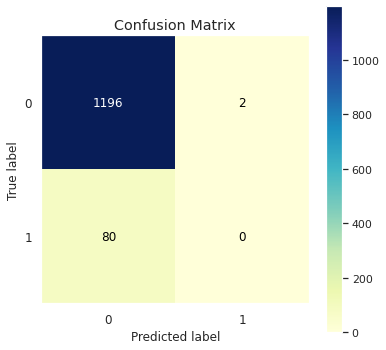

In [57]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

In [58]:
svc = SVC(C=100, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

SVC(C=100, gamma=1000, probability=True)

In [59]:
y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

1.0
0.9374021909233177


In [60]:
svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

Precision: 0.000
Recall: 0.000
F-measure: 0.000


In [61]:
y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

ROC AUC Score: 0.5


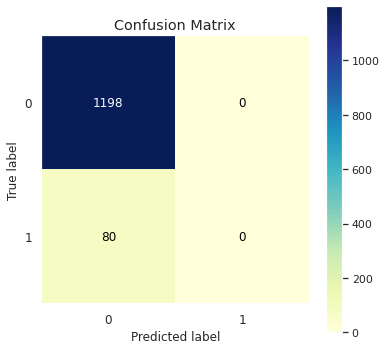

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

In [63]:
grid_models = [(SVC(probability=True),[{'C':[10,100], 'gamma':[100,500,1000],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'max_features':[5,6,10,12,14,18,20],'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01,0.05, 0.1, 0.5, 1], 'eval_metric': ['error']}])]

In [64]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
    grid.fit(x_data_balanced, y_data_balanced)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

SVC(probability=True):
Best Accuracy : 91.68%
Best Parameters :  {'C': 10, 'gamma': 100, 'kernel': 'rbf', 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.58%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 95.85%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=

In [65]:
# classification with random forest

# Change parameters
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

1.0
0.9374021909233177
Precision: 0.500
Recall: 0.025
F-measure: 0.048
ROC AUC Score: 0.5862896494156928


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

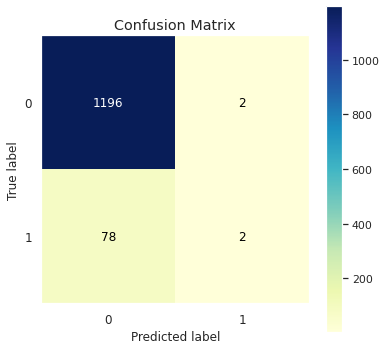

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

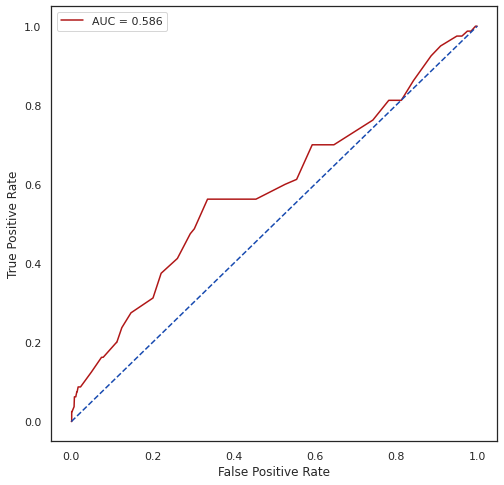

In [67]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [68]:
# Change parameters

dt =DecisionTreeClassifier(max_features=5 , max_depth=12,criterion = 'entropy', random_state=0)
dt.fit(x_data_balanced, y_data_balanced)

y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.912206444565811
0.5164319248826291
Precision: 0.074
Recall: 0.588
F-measure: 0.132
ROC AUC Score: 0.5588376460767946


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

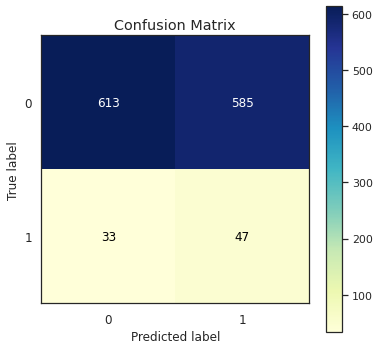

In [69]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

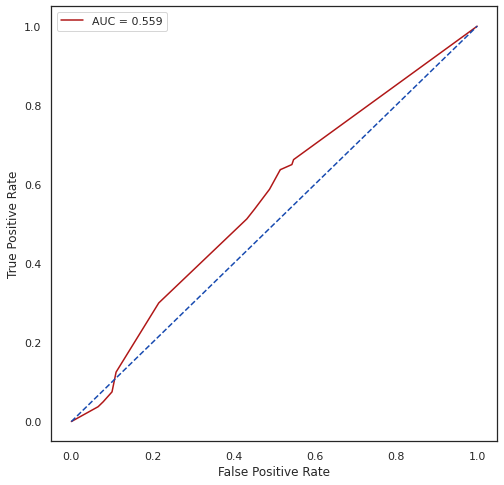

In [70]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [71]:
# Change parameters

xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(x_data_balanced, y_data_balanced)

y_pred_train_xgb = xgb.predict(x_data_balanced)
acc_train_xgb = accuracy_score(y_data_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

0.9733752048061168
0.9374021909233177
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.6472871452420701


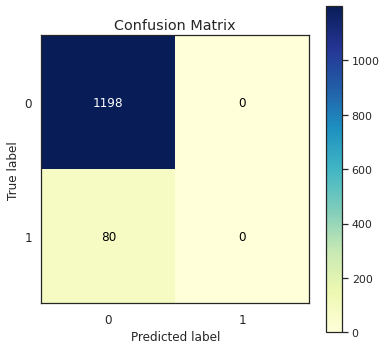

In [72]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

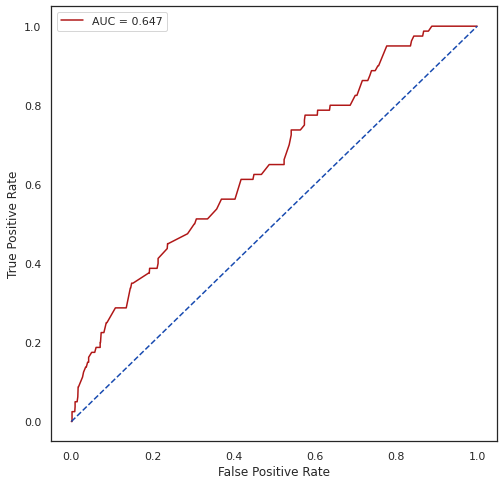

In [73]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [74]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

0.9997269251774986
0.9374021909233177
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.5


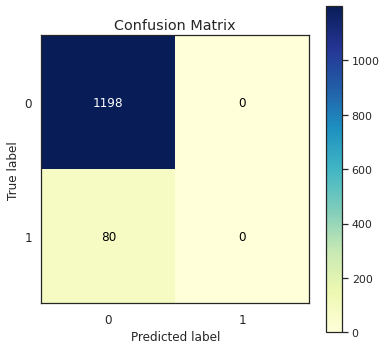

In [75]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

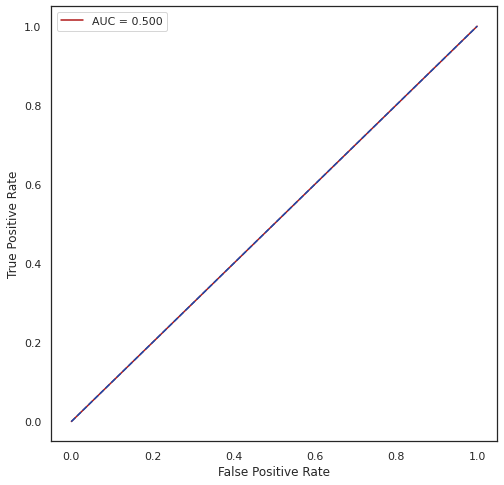

In [76]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **Comparing the algorithms**

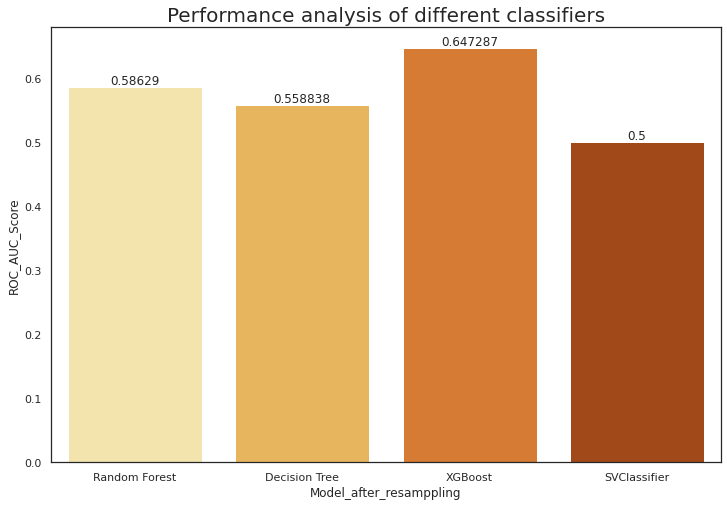

In [77]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','XGBoost','SVClassifier'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_xgb, acc_test_svc],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers',fontsize=20)
plt.show()

In [78]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Score,ROC_AUC_Score
2,XGBoost,0.937402,0.647287
0,Random Forest,0.937402,0.586290
1,Decision Tree,0.516432,0.558838
3,SVClassifier,0.937402,0.500000


In [79]:
import pickle as pkl
pkl.dump(xgb, open("stroke.pickle.dat", "wb"))

In [80]:
pkl.dump(xgb, open("stroke.pkl", "wb"))

In [81]:
pkl.dump(rf, open("stroke_rf.pkl", "wb"))

In [82]:
x_data_balanced[0]

array([0.        , 0.29199219, 0.        , 0.        , 1.        ,
       1.        , 0.23146524, 0.18098511, 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [83]:
print(data.iloc[:1])

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   

   avg_glucose_level   bmi  stroke  work_type_Govt_job  \
0             228.69  36.6       1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   

   work_type_children  smoking_status_Unknown  smoking_status_formerly smoked  \
0                   0                       0                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  


In [84]:
y_pred_new = xgb.predict([[1,49.0,0,0,1,0,171.23,34.40,0,0,1, 0, 0, 0, 0, 0, 0]])

In [85]:
y_pred_new

array([0])

In [86]:
y_pred_new = xgb.predict([[0,0.45, 1, 1, 1, 1, 0.23146524, 0.18098511, 
                           1, 1, 1, 1 , 1 , 1, 1, 1]])

In [87]:
y_pred_new

array([0])

# **Web Application**

* **So, I have deployed the model using Streamlit and Heroku. I am providing the GitHub repo link for this.**
* **Link: https://github.com/Thivas12/Heart-Stroke-Prediction-and-Classification-using-Machine-Learning**
* **Web application link: https://heart-stroke-predictr.herokuapp.com/**